In [1]:
import numpy as np
import matplotlib.pyplot as plt
from label_axes import label_axes
import blip_analysis as ba
import scipy.io as sio
import binary_recording as br
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib
import openephys as oe

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

b


In [2]:
## Load in all the data
ba.load_usrts()
glyphs = ba.get_glyphs()
good_indexes = ba.get_stable_resp_indexes()

units_usrt1 = np.load('../Data/230704_Fig1_long_usrt1.npy', allow_pickle=True)
units_usrt2 = np.load('../Data/230704_Fig1_long_usrt2.npy', allow_pickle=True)
units_usrt3 = np.load('../Data/230704_Fig1_long_usrt3.npy', allow_pickle=True)
units_usrt1 = units_usrt1[good_indexes]
units_usrt2 = units_usrt2[good_indexes]
units_usrt3 = units_usrt3[good_indexes]

mean_usrt1 = np.array([[np.mean(i, axis=0) for i in j] for j in units_usrt1])
mean_usrt2 = np.array([[np.mean(i, axis=0) for i in j] for j in units_usrt2])
mean_usrt3 = np.array([[np.mean(i, axis=0) for i in j] for j in units_usrt3])

summed_response1 = mean_usrt1[:, :, 50:100].sum(axis=-1)
summed_response2 = mean_usrt2[:, :, 50:100].sum(axis=-1)
summed_response3 = mean_usrt3[:, :, 50:100].sum(axis=-1)




Found odour 1
Found odour 3
Found odour 5


In [3]:
## Generate the linkage for the hierarchical clustering

link = linkage(summed_response1/np.max(summed_response1, axis=-1)[:, np.newaxis], optimal_ordering=True, method='complete', )
dend = dendrogram(link, no_plot=True)
leaves = dend['leaves']

In [33]:
def dendo_and_heatmaps(fig, gs, link, summed_response, norm_choice='max', zscore_params=None, flip = True, **kwargs):
    '''
    Plots both parts E and F of the figure
    '''
    colors = ['k' for i in range(300)]
    sub_gridspec = gs.subgridspec(1, 2, wspace=0.0)
    
    dend_ax = fig.add_subplot(sub_gridspec[0])
    dend = dendrogram(link, ax=dend_ax, orientation='left', truncate_mode=None, no_labels=True, color_threshold=0.1, link_color_func=lambda k: colors[k])
    dend_ax.set_ylabel('Units', labelpad=-5)
    #dend_ax.set_xlabel('Distance')
    dend_ax.set_xticks([])
    norm_heatmap_ax = fig.add_subplot(sub_gridspec[1])
    if norm_choice == 'max':
        normed_response = summed_response/np.max(summed_response, axis=-1)[:, np.newaxis]
    elif norm_choice == 'zscore_base':
        assert zscore_params is not None, 'Please pass zscore_params'
        normed_response = (summed_response - zscore_params[0])/zscore_params[1]
    
    im = norm_heatmap_ax.imshow(normed_response[dend['leaves'][::-1]], cmap='pink', aspect='auto')
#     plt.colorbar(mappable=im, ax=norm_heatmap_ax, aspect=40)
    norm_heatmap_ax.set_xticks(range(32))
    norm_heatmap_ax.set_xticklabels(glyphs, rotation=90, fontsize=5);
    norm_heatmap_ax.set_yticks([])
    divider = make_axes_locatable(norm_heatmap_ax)
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    dend_ax.spines['top'].set_visible(False)
    dend_ax.spines['left'].set_visible(False)
    dend_ax.spines['bottom'].set_visible(False)
    
    #resp_heatmap_ax = fig.add_subplot(sub_gridspec[1])

    # resp_heatmap_ax1 = fig.add_subplot(sub_sub_gridspec[0])
    # resp_heatmap_ax2 = fig.add_subplot(sub_sub_gridspec[1])
    #plt.colorbar(im, cax=cax)
#    heatmap_cbar_ax = fig.add_subplot(sub_gridspec[39])
    #plot_heatmap(resp_heatmap_ax1, mean_usrt1, select_trials, dend['leaves'][::-1], **kwargs)
#     vmax = np.max(mean_usrt1[:, select_trials])
#     plot_heatmap(resp_heatmap_ax1, mean_usrt1, conc_trials, dend['leaves'][::-1], colorbar=False, vmax=vmax, cmap='Reds', **kwargs)
#     pos = plot_heatmap(resp_heatmap_ax2, mean_usrt1, onset_trials, dend['leaves'][::-1], vmax=vmax, cmap='Blues', **kwargs)
#     normed_pos = norm_heatmap_ax.get_position()
#     cax_pos = [normed_pos.x0+normed_pos.width+0.01, normed_pos.y0+normed_pos.height*(1-0.8)/2, 0.02, normed_pos.height*0.8]
#     cax = fig.add_axes(cax_pos)
#     plt.colorbar(im, cax=cax)
#     resp_heatmap_ax2.set_yticklabels([])
#     resp_heatmap_ax2.set_ylabel('')
    #normed_cbar_ax = fig.add_subplot(sub_gridspec[37])
    cbar = plt.colorbar(mappable=im)
    cbar_pos = cbar.ax.get_position()
    heatmap_pos = norm_heatmap_ax.get_position()
    cbar_pos = [cbar_pos.x0, heatmap_pos.y0, cbar_pos.width*0.8, heatmap_pos.height]
    cbar.ax.set_position(cbar_pos)
    cbar.ax.set_aspect(50)
#     return dend_ax, resp_heatmap_ax1, resp_heatmap_ax2, dend['leaves'][::-1]


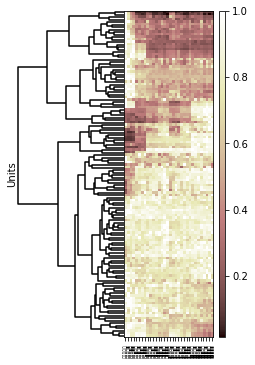

In [36]:
fig = plt.figure(figsize=(4, 6))
gs = fig.add_gridspec(1, 1)
dendo_and_heatmaps(fig, gs[0], link, summed_response1, time_ticks_base=[-0.25, 0.0, 0.25])
plt.savefig('230823_Sup13.pdf', bbox_inches='tight')